In [1]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import string
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:

# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sms_spam_collection/SMSSpamCollection")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']


# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'comp', 'txt', 'msg', 'customer']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 509


In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4755,   70],
       [ 439,  308]], dtype=int64)

In [4]:
sms_raw.head(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,comp,txt,msg,customer,allcaps
0,False,"Go until jurong point, crazy.. Available only ...",False,False,False,False,False,False,False,False,False,False,False,False
1,False,Ok lar... Joking wif u oni...,False,False,False,False,False,False,False,False,False,False,False,False
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,False,False,False,False,False,False,False,True,True,False,False,False
3,False,U dun say so early hor... U c already then say...,False,False,False,False,False,False,False,False,False,False,False,False
4,False,"Nah I don't think he goes to usf, he lives aro...",False,False,False,False,False,False,False,False,False,False,False,False
5,True,FreeMsg Hey there darling it's been 3 week's n...,False,False,False,False,False,False,False,False,False,False,False,False
6,False,Even my brother is not like to speak with me. ...,False,False,False,False,False,False,False,False,False,False,False,False
7,False,As per your request 'Melle Melle (Oru Minnamin...,False,False,False,False,False,False,False,False,False,False,False,False
8,True,WINNER!! As a valued network customer you have...,False,False,False,False,False,False,False,False,False,False,True,False
9,True,Had your mobile 11 months or more? U R entitle...,False,False,False,False,True,False,False,False,False,False,False,False


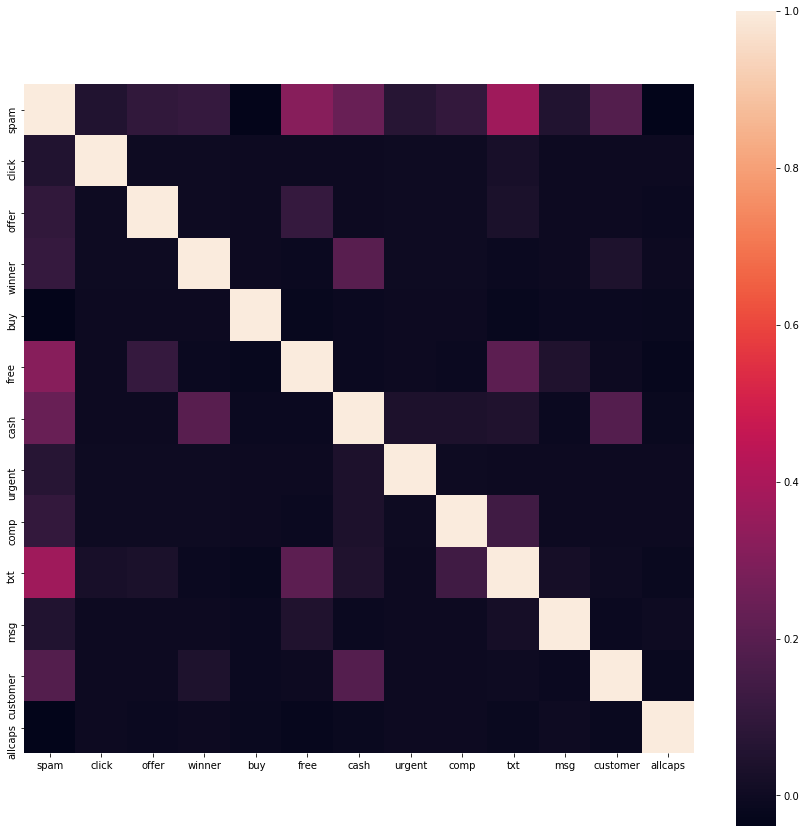

In [5]:
plt.figure(figsize=[15,15])
correlations_sms = sns.heatmap(sms_raw.corr(),square=True)

In [6]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(data, target)
y_pred_log = log.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred_log).sum()
))

Number of mislabeled points out of a total 5572 points : 521


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=0)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4457 entries, 1114 to 2732
Data columns (total 12 columns):
click       4457 non-null bool
offer       4457 non-null bool
winner      4457 non-null bool
buy         4457 non-null bool
free        4457 non-null bool
cash        4457 non-null bool
urgent      4457 non-null bool
comp        4457 non-null bool
txt         4457 non-null bool
msg         4457 non-null bool
customer    4457 non-null bool
allcaps     4457 non-null bool
dtypes: bool(12)
memory usage: 87.1 KB


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clrTree = DecisionTreeClassifier() 
clrTree = clrTree.fit(x_train, y_train) 
outTree = clrTree.predict(x_test)

clrKN = KNeighborsClassifier() 
clrKN = clrKN.fit(x_train, y_train) 
outKN = clrKN.predict(x_test)

print("Accuracy for Decision Tree Classifier: " + str(accuracy_score(y_test, outTree)*100)+"%") 
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, outKN)*100)+"%")

Accuracy for Decision Tree Classifier: 90.76233183856502%
Accuracy for KNeighbors Classifier: 89.95515695067265%


In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)

print("Number of mislabeled points out of a total {} points : {}".format(
    x_test.shape[0],
    (y_test != y_pred).sum()
))
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, y_pred)*100)+"%")


Number of mislabeled points out of a total 1115 points : 103
Accuracy for KNeighbors Classifier: 90.76233183856502%


In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    x_test.shape[0],
    (y_test != y_pred_log).sum()
))
print("Accuracy for KNeighbors Classifier: " + str(accuracy_score(y_test, y_pred_log)*100)+"%")


Number of mislabeled points out of a total 1115 points : 104
Accuracy for KNeighbors Classifier: 90.67264573991032%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
